# An implementation to calculate and plot the Fourier Transformation.
The Fourier Transformation $F_n(x)$, where $F: \mathbb{N} \rightarrow \mathbb{R}$ is an approximation, where $n$ is the number of iterations.
$$a_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(k x) dx$$
$$b_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(k x) dx$$
$$F_n(x)= \frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos(kx)+b_k \sin(kx)$$

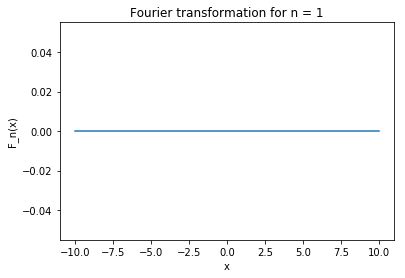

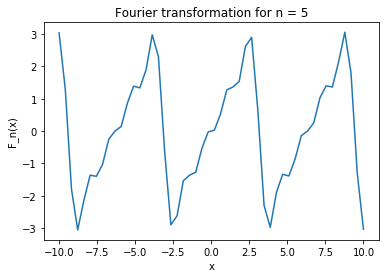

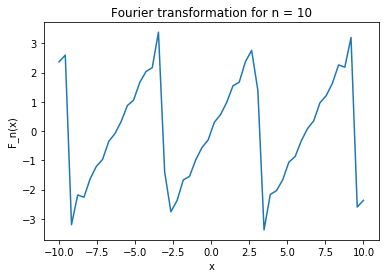

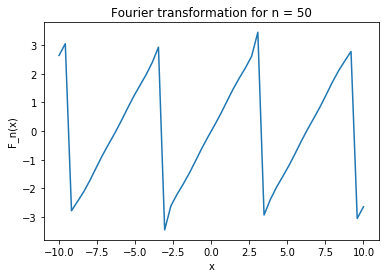

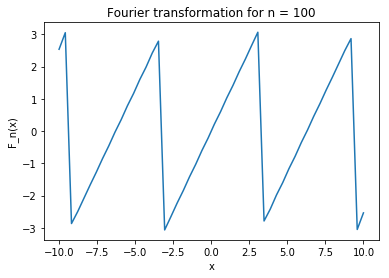

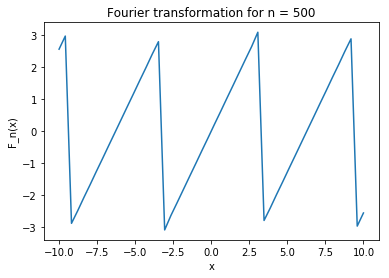

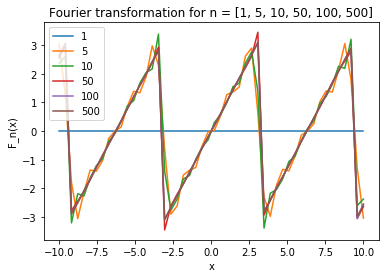

In [3]:
# Copyright by Dejan Kostyszyn

%matplotlib inline
from scipy import integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

# Setting n (must be a list).
n = [1, 5, 10, 50, 100, 500]

# Defining f(x)
def f(x):
    return x

# Defining function for calculating a_k
def int_cos(x, k):
    return f(x) * np.cos(x * k)

def calc_a_k(k):
    tmp = integrate.quad(int_cos, -np.pi, np.pi, args=(k,), limit=1000)
    return (1 / np.pi) * tmp[0]

# Defining function for calculating b_k
def int_sin(x, k):
    return f(x) * np.sin(x * k)

def calc_b_k(k):
    tmp = integrate.quad(int_sin, -np.pi, np.pi, args=(k,), limit=1000)
    return (1 / np.pi) * tmp[0]

# Calculating the fourier transformation
def fourier_transformation(x, n_i):
    # Calculating a_k
    a_k = []
    for k in range(0, n_i):
        a_k.append(calc_a_k(k))
        
     # Calculating b_k.
    b_k = []
    for k in range(0, n_i):
        b_k.append(calc_b_k(k))   
        
    result = a_k[0] / 2
    for k in range(0, n_i):
        result = result + a_k[k] * np.cos(k * x) + b_k[k] * np.sin(k * x)
    return result

# Plotting Fourier Transformation in separate figures.
x = np.linspace(-10, 10)
for item in n:
    plt.plot(x, fourier_transformation(x, item))
    plt.title("Fourier transformation for n = {}".format(item))
    plt.xlabel("x")
    plt.ylabel("F_n(x)")
    plt.show()
    
# Plotting Fourier Transformation in one figure
for item in n:
    plt.plot(x, fourier_transformation(x, item), label = item)
plt.title("Fourier transformation for n = {}".format(n))
plt.xlabel("x")
plt.ylabel("F_n(x)")
plt.legend()
plt.show()